# FONTES ENERGÉTICAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fe = pd.read_csv('relatorio.csv', sep=';', encoding='utf-8')
fe.head(3)

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Tipo de Fonte Energética,Quantidade Consumida,Unidade de Medida,Observações,Energia,Emissões de CO2,Situação Cadastral
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2012,Gás Natural (Seco),"1920000,00",t/m³,A quantidade de gás natural utilizada como mat...,"52,34","2921,72",Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2013,Eletricidade - Rede Pública,"232,85",MWh,"Se possível, informe a quantidade de energia c...","0,84","0,00",Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2014,Eletricidade - Rede Pública,"314,79",MWh,"Se possível, informe a quantidade de energia c...","1,13","0,00",Ativa


In [300]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CNPJ                      212029 non-null  object
 1   Razão Social              212029 non-null  object
 2   Estado                    212029 non-null  object
 3   Município                 212029 non-null  object
 4   Código da Categoria       212029 non-null  int64 
 5   Categoria de Atividade    212029 non-null  object
 6   Código do Detalhe         212029 non-null  int64 
 7   Detalhe                   212029 non-null  object
 8   Ano                       212029 non-null  int64 
 9   Tipo de Fonte Energética  212029 non-null  object
 10  Quantidade Consumida      212029 non-null  object
 11  Unidade de Medida         212029 non-null  object
 12  Observações               186019 non-null  object
 13  Energia                   212029 non-null  object
 14  Emis

### Troca de str para float
Nota-se que os valores de Consumo, Energia e Emissão estão em str

In [182]:
fe.columns[14]

'Emissões de CO2 '

Tem um espaço depois do CO2, por isso que deu erro tentando transformar em float

Ao tentar fazer a tranformação dava erro nos números por causa da vírgula

In [4]:
fe['Quantidade Consumida'] = fe['Quantidade Consumida'].astype(float)
fe['Energia'] = fe['Energia'].astype(float)
[fe.columns[14]] = fe[fe.columns[14]].astype(float)

ValueError: could not convert string to float: '1920000,00'

#### Está dando erro provavelmente porque possui pontos nos números

Primeiro retirar o '.' (fiz isso pelo excel, pois não consegui pelo python) e depois substituir a ',' pelo '.'

In [5]:
#TESTES TENTANDO RETIRAR O PONTO DAS STRINGS
#fe['Energia'] = fe['Energia'].replace('.','', regex=True).replace(',','.', regex=True)
#fe['Energia'].stack().str.replace('.','').unstack()
#fe['Energia'] = fe['Energia'].apply(lambda x: locale.currency(x))
#fe['Energia'] = fe['Energia'].apply(lambda x: x.replace(',', '', inplace=True)

fe['Energia'].replace(to_replace=',', value='.', regex=True, inplace=True)
fe['Quantidade Consumida'].replace(to_replace=',', value='.', regex=True, inplace=True)
fe['Emissões de CO2 '].replace(to_replace=',', value='.', regex=True, inplace=True)

In [309]:
fe.head()

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Tipo de Fonte Energética,Quantidade Consumida,Unidade de Medida,Observações,Energia,Emissões de CO2,Situação Cadastral
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2012,Gás Natural (Seco),1920000.00,t/m³,A quantidade de gás natural utilizada como mat...,52.34,2921.72,Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2013,Eletricidade - Rede Pública,232.85,MWh,"Se possível, informe a quantidade de energia c...",0.84,0.00,Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2014,Eletricidade - Rede Pública,314.79,MWh,"Se possível, informe a quantidade de energia c...",1.13,0.00,Ativa
3,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2015,Eletricidade - Rede Pública,241.43,MWh,"Se possível, informe a quantidade de energia c...",0.87,0.00,Ativa
4,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2016,Eletricidade - Rede Pública,223.42,MWh,"Se possível, informe a quantidade de energia c...",0.80,0.00,Ativa


In [313]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CNPJ                      212029 non-null  object 
 1   Razão Social              212029 non-null  object 
 2   Estado                    212029 non-null  object 
 3   Município                 212029 non-null  object 
 4   Código da Categoria       212029 non-null  int64  
 5   Categoria de Atividade    212029 non-null  object 
 6   Código do Detalhe         212029 non-null  int64  
 7   Detalhe                   212029 non-null  object 
 8   Ano                       212029 non-null  int64  
 9   Tipo de Fonte Energética  212029 non-null  object 
 10  Quantidade Consumida      212029 non-null  float64
 11  Unidade de Medida         212029 non-null  object 
 12  Observações               186019 non-null  object 
 13  Energia                   212029 non-null  f

In [6]:
fe['Quantidade Consumida'] = fe['Quantidade Consumida'].astype(float)
fe['Energia'] = fe['Energia'].astype(float)
fe[fe.columns[14]] = fe[fe.columns[14]].astype(float)

In [7]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CNPJ                      212029 non-null  object 
 1   Razão Social              212029 non-null  object 
 2   Estado                    212029 non-null  object 
 3   Município                 212029 non-null  object 
 4   Código da Categoria       212029 non-null  int64  
 5   Categoria de Atividade    212029 non-null  object 
 6   Código do Detalhe         212029 non-null  int64  
 7   Detalhe                   212029 non-null  object 
 8   Ano                       212029 non-null  int64  
 9   Tipo de Fonte Energética  212029 non-null  object 
 10  Quantidade Consumida      212029 non-null  float64
 11  Unidade de Medida         212029 non-null  object 
 12  Observações               186019 non-null  object 
 13  Energia                   212029 non-null  f

In [315]:
fe['Município'].value_counts().head()

SAO PAULO                  4953
CAXIAS DO SUL              4262
RIO DE JANEIRO             2329
CACHOEIRO DE ITAPEMIRIM    2091
MANAUS                     2048
Name: Município, dtype: int64

In [316]:
fe['Categoria de Atividade'].value_counts().head()

Indústria de Produtos Alimentares e Bebidas     41096
Indústria Química                               23757
Indústria de Produtos Minerais Não Metálicos    22271
Indústria Metalúrgica                           18585
Extração e Tratamento de Minerais               15211
Name: Categoria de Atividade, dtype: int64

In [8]:
fe['Estado'].value_counts().head()

SAO PAULO            55944
MINAS GERAIS         41346
RIO GRANDE DO SUL    24908
SANTA CATARINA       20575
PARANA               14484
Name: Estado, dtype: int64

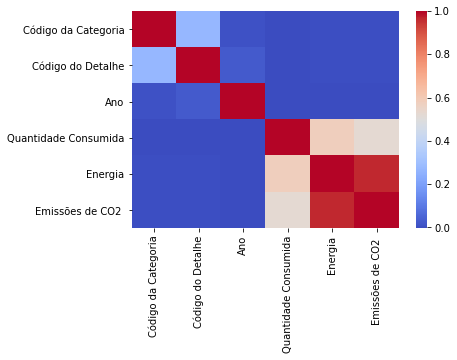

In [367]:
sns.heatmap(fe.corr(), cmap='coolwarm')

Lista dos estados e categorias

In [133]:
states = [states for states, df in fe.groupby('Estado')]
cod_cat = [cod for cod, df in fe.groupby('Código da Categoria')]

#### Nota-se um relação entre Energia e CO2

####### O QUE DA PRA EXPLORAR COM ESSE ARQUIVO ##### 
- Da pra fazer uma relação de codigos de categoria em relação ao estado
- consumo por estado
- categoria que mais consome energia
- tem que retirar as linhas que não estão com medidas em Mwh
- quantidade de empresas inativas por estado e/ou região
- O que significa essa "energia"? é a energia gerada? energia utilizada?
- Tipo de Fonte Energética por setor e por estado


In [50]:
fe[['Estado','Código da Categoria']]

,Estado,Código da Categoria
0,SAO PAULO,11
1,SAO PAULO,11
2,SAO PAULO,11
3,SAO PAULO,11
4,SAO PAULO,11
...,...,...
212024,RIO GRANDE DO SUL,7
212025,RIO GRANDE DO SUL,7
212026,RIO GRANDE DO SUL,7
212027,RIO GRANDE DO SUL,7


In [103]:
medidas = [medidas for medidas, df in fe.groupby('Unidade de Medida')]
medidas

['MWh', 'TON', 't/mdc', 't/m³', 't/st']

In [107]:
situa = [situa for situa, df in fe.groupby('Situação Cadastral')]
situa

['Ativa',
 'Cadastramento indevido',
 'Encerramento de atividades',
 'Suspenso para Averiguações - dados cadastrais inconsistentes e_ou recadastramento',
 'Suspenso para averiguações']

In [112]:
fe_ativos = fe[fe['Situação Cadastral'] == 'Ativa']

In [119]:
cnpj = fe_ativos.groupby('Ano').count()['CNPJ']
anos = [ano for ano, df in fe.groupby('Ano')]

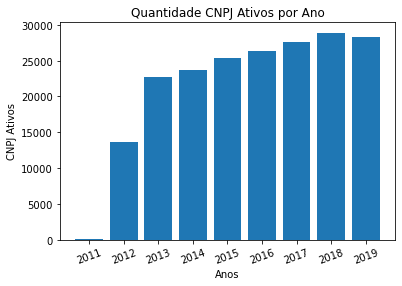

In [123]:
plt.bar(anos, cnpj)
plt.xticks(anos, rotation = 20)
plt.ylabel('CNPJ Ativos')
plt.xlabel('Anos')
plt.title('Quantidade CNPJ Ativos por Ano')
plt.show()

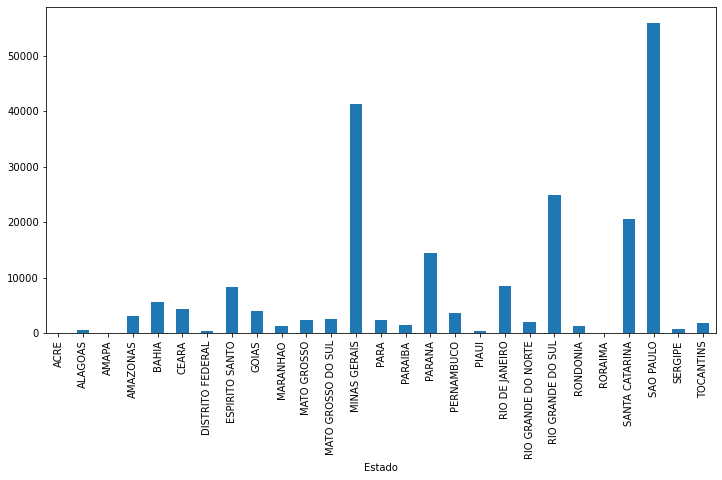

In [154]:
states=fe.groupby('Estado').count()['CNPJ']
states.plot.bar(figsize=(12,6),)

##### Nota-se que os top 5 que mais possuem fontes energéticas no Brasil são: SP, MG, RS, SC e PR

In [125]:
fe_mwh = fe[fe['Unidade de Medida'] == 'MWh']
fe_ton = fe[fe['Unidade de Medida'] == 'TON']
fe_mdc = fe[fe['Unidade de Medida'] == 't/mdc']
fe_m3 = fe[fe['Unidade de Medida'] == 't/m³']
fe_st = fe[fe['Unidade de Medida'] == 't/st']

In [165]:
fe_mwh.groupby(['Estado', 'Ano']).sum().reset_index()

,Estado,Ano,Código da Categoria,Código do Detalhe,Quantidade Consumida,Energia,Emissões de CO2
0,ACRE,2012,16,13,2134664.71,7684792.97,0.0
1,ACRE,2013,16,13,0.22,0.00,0.0
2,ACRE,2014,55,24,1753089.12,1.10,0.0
3,ACRE,2015,40,65,207.41,0.74,0.0
4,ACRE,2016,61,67,4325.37,15.57,0.0
...,...,...,...,...,...,...,...
215,TOCANTINS,2015,1050,971,97992446.58,346550.52,0.0
216,TOCANTINS,2016,931,621,58774981.28,203963.48,0.0
217,TOCANTINS,2017,830,425,63577043.64,228340.54,0.0
218,TOCANTINS,2018,729,411,12071208.17,43379.84,0.0
